## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import os

Getting the Current Working Directory using the os module

In [2]:
pwd = os.getcwd()

# Gathering Data

Reading a CSV file  and create a dataframe

In [3]:
df = pd.read_csv(pwd + '\\data\\bottle.csv')
df.head()

C:\Users\asnaw\AppData\Local\Temp\ipykernel_8464\3341140360.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pwd + '\\data\\bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_modified = df.copy()

In [5]:
df_modified = df_modified[['T_degC', 'Salnty', 'O2ml_L', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM']]
df_modified


,T_degC,Salnty,O2ml_L,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM
0,10.500,33.4400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.460,33.4400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.460,33.4370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.450,33.4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.450,33.4210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
864858,18.744,33.4083,5.805,0.905,0.176,0.22,1.77,0.029,0.10
864859,18.744,33.4083,5.805,0.905,0.176,0.22,1.77,0.029,0.10
864860,18.692,33.4150,5.796,0.915,0.182,0.20,1.75,0.027,0.09
864861,18.161,33.4062,5.816,1.078,0.313,0.25,1.99,0.030,0.11


# Assesing Data and Cleaning Data

In [6]:
df_modified.isna().sum()

T_degC     10963
Salnty     47354
O2ml_L    168662
ChlorA    639591
Phaeop    639592
PO4uM     451546
SiO3uM    510772
NO2uM     527287
NO3uM     527460
dtype: int64

In [7]:
df_modified.dropna(inplace=True)
df_modified.reset_index(drop=True, inplace=True)
df_modified

,T_degC,Salnty,O2ml_L,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM
0,15.340,33.4920,5.860,0.850,0.190,0.25,2.00,0.000,0.10
1,15.340,33.4920,5.860,0.850,0.190,0.25,2.00,0.000,0.10
2,15.320,33.4900,5.860,0.650,0.230,0.28,2.00,0.000,0.10
3,15.320,33.4900,5.860,0.620,0.240,0.28,2.00,0.000,0.10
4,15.280,33.4900,5.860,0.580,0.220,0.29,2.50,0.000,0.40
...,...,...,...,...,...,...,...,...,...
207225,18.744,33.4083,5.805,0.905,0.176,0.22,1.77,0.029,0.10
207226,18.744,33.4083,5.805,0.905,0.176,0.22,1.77,0.029,0.10
207227,18.692,33.4150,5.796,0.915,0.182,0.20,1.75,0.027,0.09
207228,18.161,33.4062,5.816,1.078,0.313,0.25,1.99,0.030,0.11


In [8]:
columns = ['T_degC', 'Salnty', 'O2ml_L', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM']
for column in columns:
    df_modified = df_modified[df_modified[column] != 0]
df_modified

,T_degC,Salnty,O2ml_L,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM
5,15.230,33.4900,5.850,0.530,0.180,0.31,3.00,0.010,0.70
6,12.980,33.4730,5.190,0.370,0.210,0.71,7.30,0.110,6.40
7,12.070,33.5420,4.640,0.250,0.240,0.93,12.00,0.060,10.30
8,11.690,33.5740,4.410,0.210,0.230,1.01,13.40,0.090,12.00
9,11.040,33.6360,4.010,0.130,0.180,1.15,16.00,0.040,14.30
...,...,...,...,...,...,...,...,...,...
207225,18.744,33.4083,5.805,0.905,0.176,0.22,1.77,0.029,0.10
207226,18.744,33.4083,5.805,0.905,0.176,0.22,1.77,0.029,0.10
207227,18.692,33.4150,5.796,0.915,0.182,0.20,1.75,0.027,0.09
207228,18.161,33.4062,5.816,1.078,0.313,0.25,1.99,0.030,0.11


# Identify relationships in the dataset

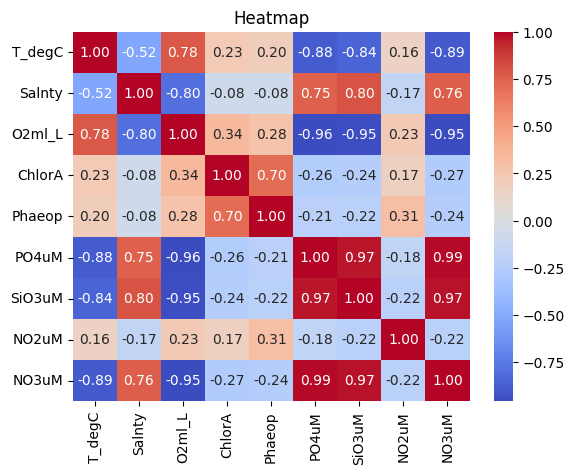

In [9]:
heatmap_data = df_modified.corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap')
plt.show()

In [10]:
df_new500 = df_modified.tail(900)
df_new500.describe()

,T_degC,Salnty,O2ml_L,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NO3uM
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,12.874186,33.444294,4.508447,0.492576,0.208914,1.001867,10.962078,0.082723,10.717344
std,3.008269,0.228104,1.083733,0.870150,0.188721,0.598935,9.234704,0.110435,9.145234
min,8.158000,32.811000,1.344000,0.001000,0.010000,0.130000,0.120000,0.004000,0.010000
25%,10.444500,33.289825,3.723750,0.061000,0.074000,0.440000,2.987500,0.026000,1.407500
50%,12.273000,33.401600,4.744500,0.193500,0.166000,0.930000,8.225000,0.040000,9.640000
75%,14.749250,33.556600,5.454250,0.481500,0.285500,1.512500,17.000000,0.100500,18.770000
max,23.023000,34.171600,6.408000,7.037000,1.660000,2.490000,41.320000,1.429000,30.690000


# Exploring the data scatter

Selecting features with strong correlation for analysis

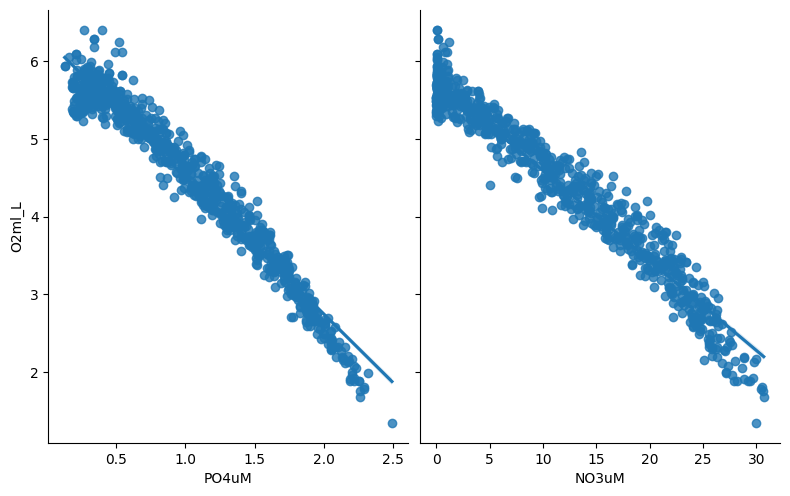

In [11]:
sns.pairplot(df_new500, x_vars=['PO4uM', 'NO3uM'], y_vars=['O2ml_L'], height=5, aspect=.8, kind="reg")
plt.show()


# Training the model

In [12]:
X = df_new500[['PO4uM', 'NO3uM']].values.reshape(-1,2)
Y = df_new500['O2ml_L']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [14]:
x = X_train[:, 0]
y = X_train[:, 1]
z = y_train

x_pred = np.linspace(0, 2.5, 15)
y_pred = np.linspace(0, 31, 15)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


In [15]:
ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)
predicted = model.predict(model_viz)

r2 = model.score(X_test, y_test)

# Exploring The Results and Evaluation Metrics For Regression

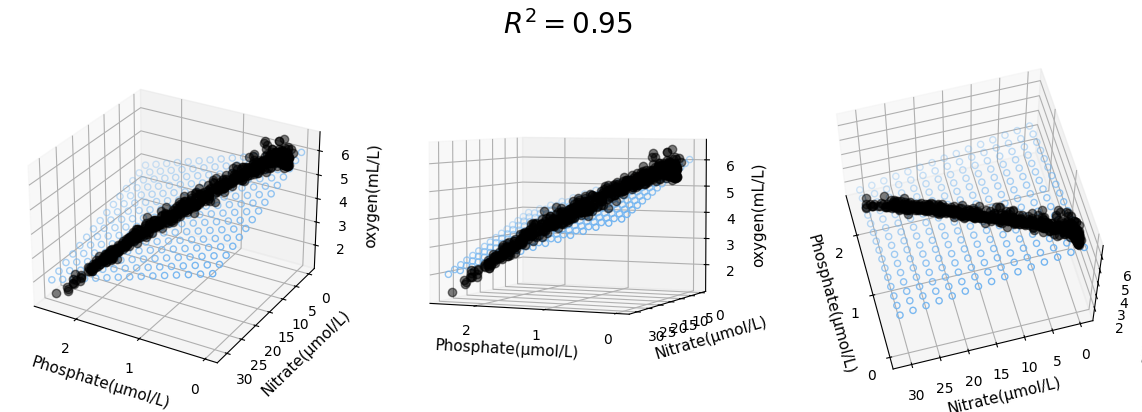

In [16]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Phosphate(μmol/L)', fontsize=11)
    ax.set_ylabel('Nitrate(μmol/L)', fontsize=11)
    ax.set_zlabel('oxygen(mL/L)', fontsize=11)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [17]:
print(f'Performance: {r2}')
mae = mean_absolute_error(y_true=y_test,y_pred=predicted)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=predicted) #default=True
rmse = root_mean_squared_error(y_true=y_test,y_pred=predicted)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Performance: 0.952901270377393
MAE: 1.2561997169238834
MSE: 2.3185853020738545
RMSE: 1.5226901530100778
